In [1]:
import numpy as np
from scipy.io.wavfile import read
from IPython.display import display, Audio, Image

## Convolution

Like FM synthesis, convolution is a type of cross-synthesis, a process through which the sonic characteristics of one signal is used to alter the character of another.

### Convolutional reverb

In convolution reverb, we combine an input signal with an **impulse response** which contains information about the acoustic properties of a particular space (e.g., concert hall).

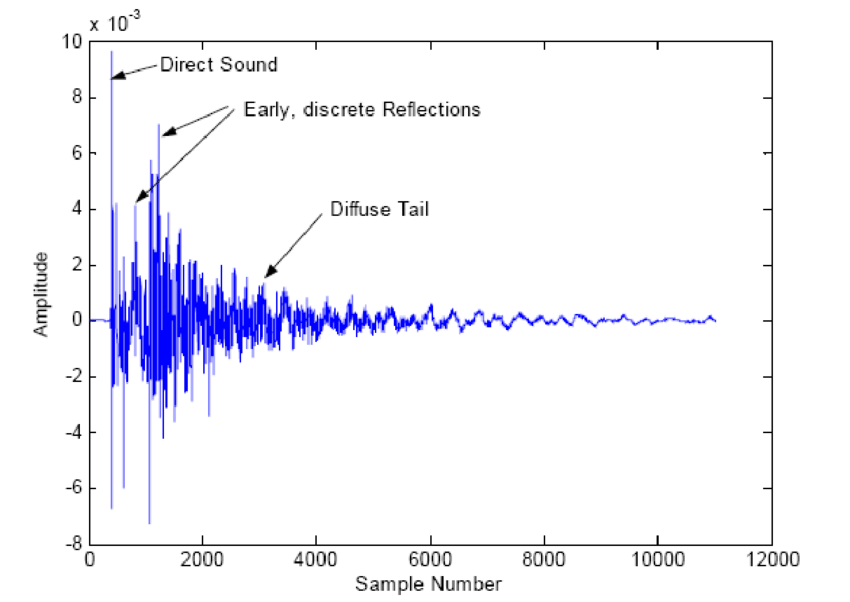

In [2]:
Image(url="https://audiotech2images.s3.us-east-2.amazonaws.com/IRshortReverb.png", embed=True, width=500)

An impulse response is created by playing a sound, or an impulse, in a space. The impulse is usually a short, percussive sound (a starter pistol, a clapboard / slate, a balloon popping, etc.) but can sometimes be a more sustained sound that moves through the frequency spectrum (e.g., a sine sweep). 

People record and collect these impulse responses (though researchers also try to predict and model the impulse responses themselves) and they form the basis of many reverb plugins in DAWs. These impulse responses are then used to transform an input signal to recreate the timbre of a particular space or setting.

The particular acoustic properties of the setting have to do with the distance between and directions of reflections of the sound source.

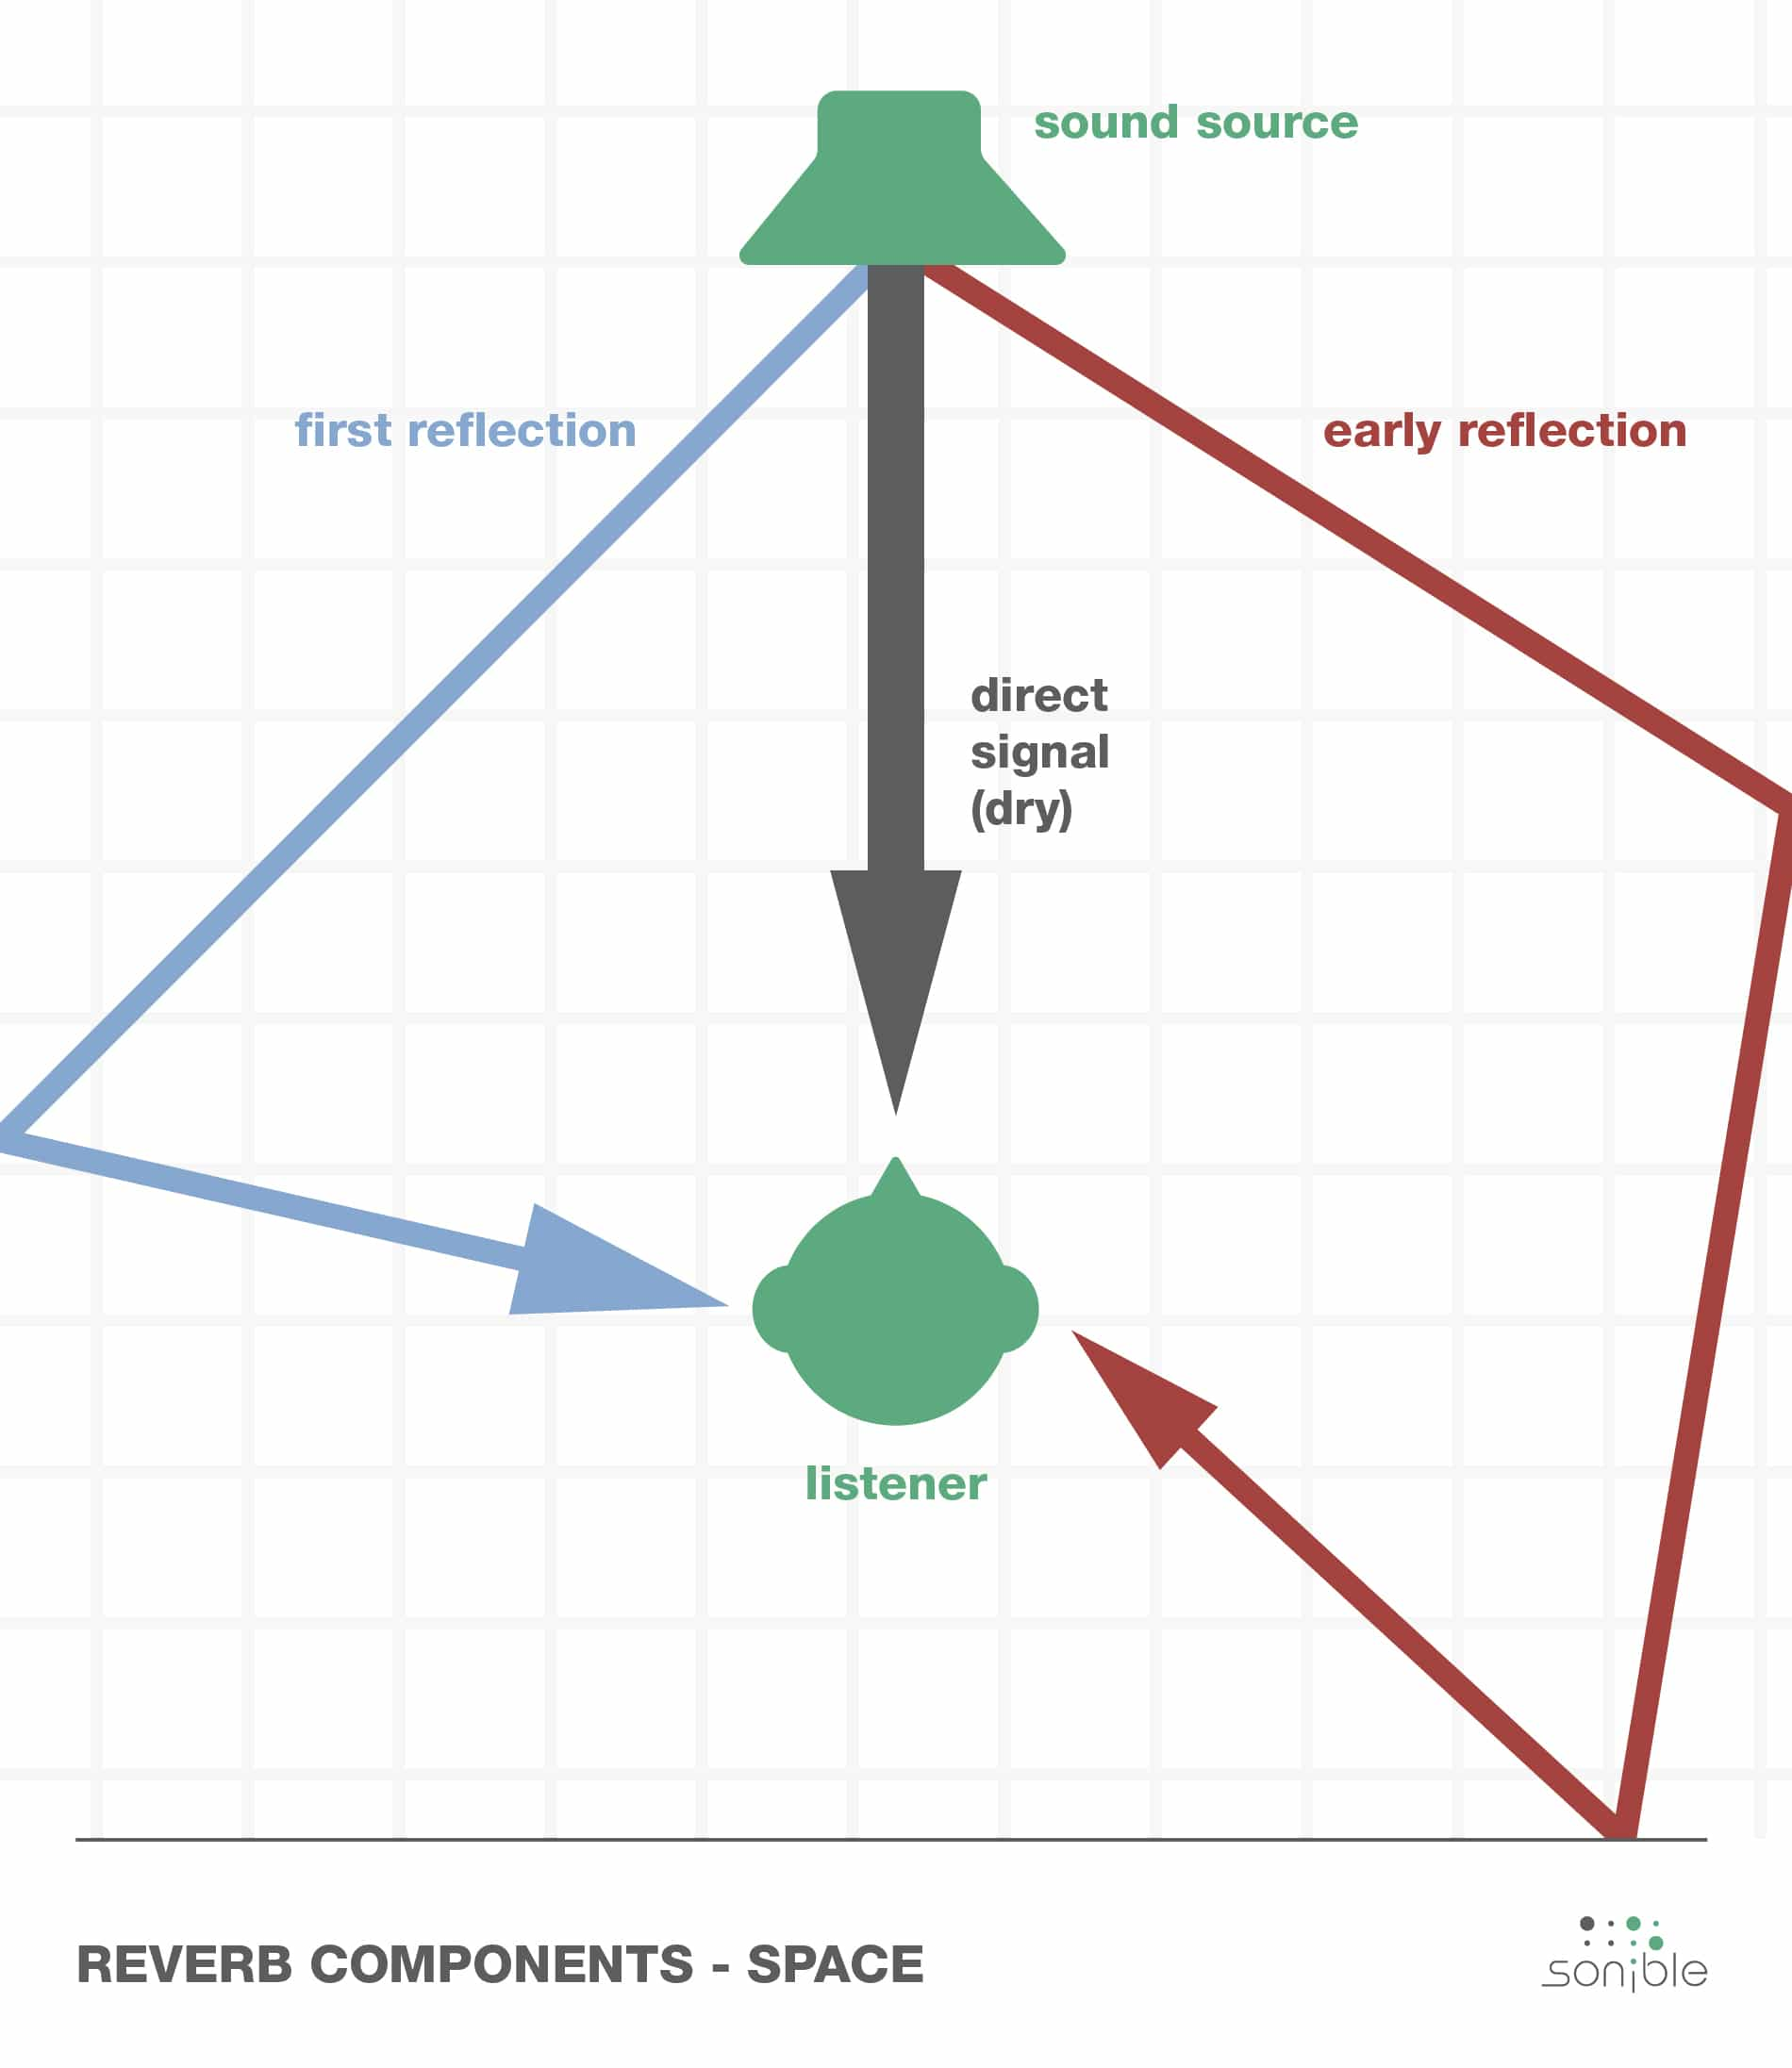

In [3]:
Image(url="https://audiotech2images.s3.us-east-2.amazonaws.com/earlyLateReflections.jpg", embed=True, width=500)

Let's listen to an example first. We will take the sound of a (dry) dog bark and convolve it with an impulse response to create a bark with reverb:

In [4]:
import IPython.display as ipd
#read in audio
(fs, bark) =  read('../uploaded_files/dog_bark_dry.wav')
#impulse one
(fs2, ir) =  read('../uploaded_files/impulse-response.wav')
#impulse two
(fs3, ir2) = read('../uploaded_files/IR_medium.wav')

#convert bark and ir2 which are stereo to mono by just using first channel:
bark = bark[:,0]
ir2 = ir2[:,0]

#dog bark alone
ipd.display(ipd.Audio(bark, rate=fs))
# Impulse 1 response 
ipd.display(ipd.Audio(ir, rate=fs2))
# Impulse 2 response 
ipd.display(ipd.Audio(ir2, rate=fs3))

First, we'll use the numpy function `convolve` to convolve the two time series. First we have to normalize the values and convert to floating point due to the nature of scaling problems with convolution:

In [5]:
#convert np.int16 files into float32
def convert_to_float(file):
    file_c = file.astype(np.float32, order='C')/32768.0
    return(file_c)

bark = convert_to_float(bark)
ir = convert_to_float(ir)
ir2 = convert_to_float(ir2)

In [6]:
c1 = np.convolve(bark, ir)
Audio(c1, rate=fs)

In [7]:
#perhaps clearer with the IR with larger reverb properties
c2 = np.convolve(bark, ir2)
Audio(c2, rate=fs)

Keep in mind that impulse responses can be any audio clip whatsoever, and do not have to necessarily be recorded. However, the downside of using convolution is that it a processing-intensive process (i.e., takes up time and memory to perform).

Let's take a look at what convolution is and how it works. 

Let's say we have some signal response, SI such that:   
$$SI = 2 4 3 6$$

And and impulse response, IR such that:
$$IR = 1 5 2 3 4$$

Convolution essentially maps the interaction of two functions (f1, f2) over time to a third function (f1 * f2). In our case, "time" here will be represented by the incrementation of samples. We understand that each sample number is processed at a different time, T. 

What we need to do is to multiply every sample value from our input signal (SI) to each value of our impulse response (IR). We then add those signals together but shifted in increments of time, T, where T is just one sample.

Let's do it manually
**Step 1:** Multiply every value of IR by SI[0] (i.e., "2") and view your result. You should have:

In [8]:
SI = np.array([2,4,3,6])
IR = np.array([1,5,2,3,4])

IR * SI[0]

array([ 2, 10,  4,  6,  8])

Next we will multiply every value of IR by SI[1] (i.e., "4") and view our result:

In [9]:
IR * SI[1]

array([ 4, 20,  8, 12, 16])

We continue this process for the length of SI, and then we add them together. However, we have to shift by time T and add such that we end up adding the values like so:

|   |   |   |   |   |   |   |   | |
|-|-|-|-|-|-|-|-|-|
T3|   |   |   | 6  | 30  | 12  | 18 | 24  |
T2|   |   |  3 | 15  | 6  | 9  | 12  |   |
T1|   |  4 | 20  | 8  | 12  | 16  |   |   |
T0|  2 | 10  | 4  | 6  | 8  |   |   |   |

Summing the vertical columns results in the complete convolution. Notice the size of the array should be the length of SI + IR - 1

In [10]:
np.convolve(SI, IR)

array([ 2, 14, 27, 35, 56, 37, 30, 24])